In [2]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 12.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user dash-bootstrap-components


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 918.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install jupyter-dash

Note: you may need to restart the kernel to use updated packages.


In [5]:
import dash
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import dash_table
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import sys


In [6]:
data = pd.read_csv('healthy-lifestyle-cities-report-2021/healthy_lifestyle_city_2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [7]:
data.duplicated().sum()

0

In [8]:
data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


In [9]:
data['Cost of a bottle of water(City)'] = data['Cost of a bottle of water(City)'].str.replace(r'\£', '')
data['Cost of a monthly gym membership(City)'] = data['Cost of a monthly gym membership(City)'].str.replace(r'\£', '')
data['Obesity levels(Country)'] = data['Obesity levels(Country)'].str.replace(r'\%', '')
data=data._convert(numeric=True)
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.1,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154,523,32.53


In [10]:
fig = px.scatter(data, x="Obesity levels(Country)", y="Life expectancy(years) (Country)")
fig.show()


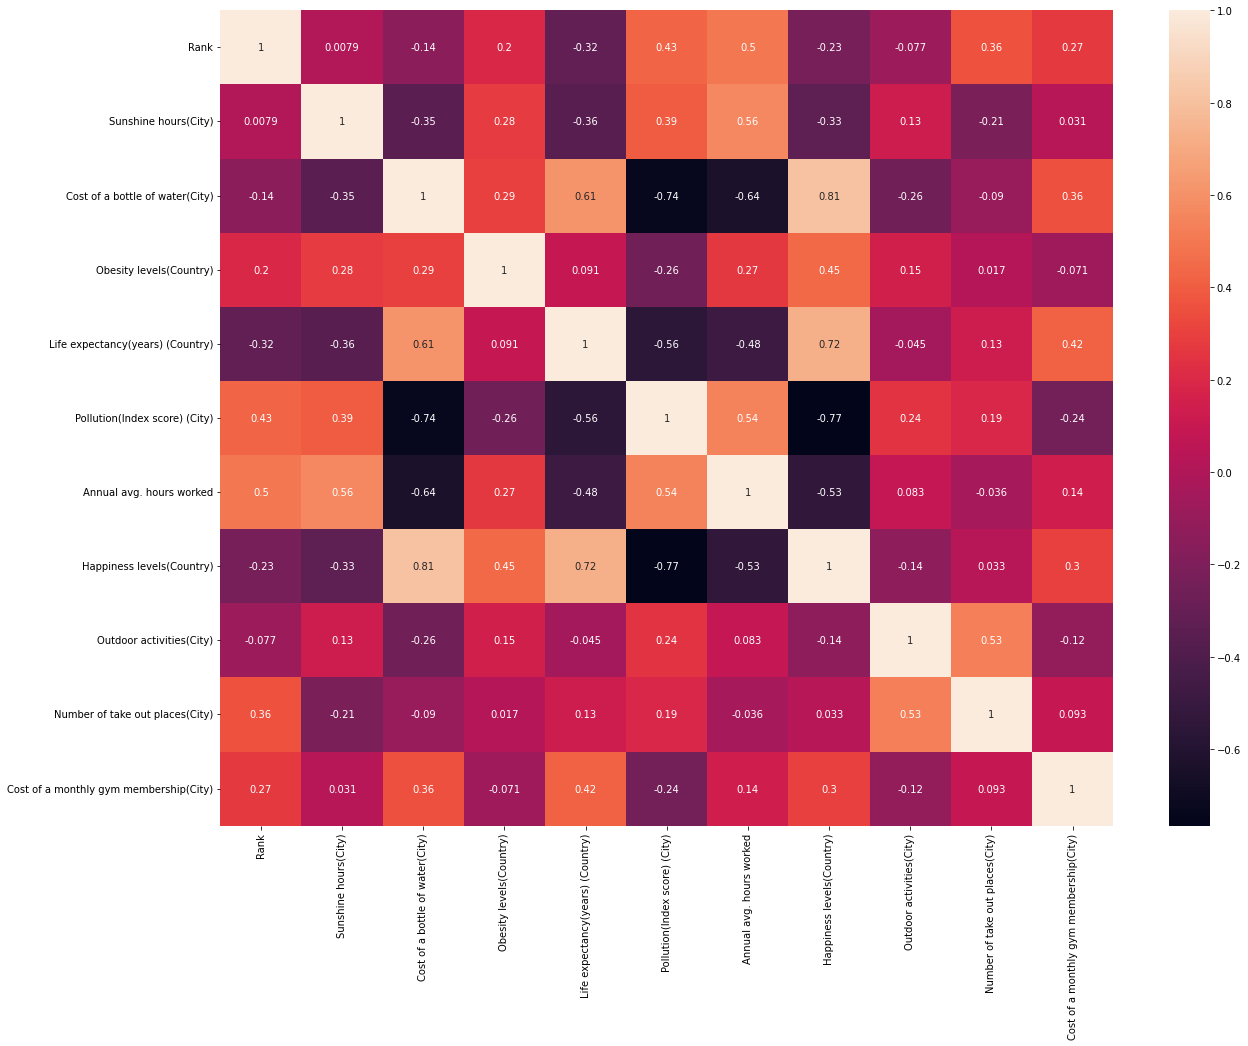

In [11]:
import seaborn as sn
corrMatrix = data.corr()
plt.subplots(figsize=(20,15))

sn.heatmap(corrMatrix, annot=True)

plt.show()

In [12]:
#deleting the colums that have no corelation between ( happiness , life expatancy or rank of the city)
del data['Cost of a monthly gym membership(City)']
del data['Sunshine hours(City)']
del data['Number of take out places(City)']


In [13]:
app = dash.Dash(
    external_stylesheets=[dbc.themes.MINTY],meta_tags=[{'name': 'viewport',
                            'content': 'width=device-width, initial-scale=1.0'}]
)

app.layout = dbc.Container([

    dbc.Row(
        dbc.Col(html.H1("Healthy Lifestyle  Cities Dashboard",
                        className='text-center text-dark mb-4 '),
                width=12)
    ),
    
    dbc.Row([dbc.Col([dbc.CardBody([html.H4("Life expectancy", className="card-title text-success"),
                html.P(
                    " Depends mostly on the happniess level"
                    "",
                    className="card-text",
                )]
        ),
    ]),
             
         dbc.Col([dbc.CardBody([html.H4("Happniess level", className="card-title text-success"),
                html.P(
                    " Depends mostly on the Cost bottle of water"
                    "",
                    className="card-text",
                )]
        ),
    ]),
        dbc.Col([dbc.CardBody([html.H4("Rank of healtiest city", className="card-title text-success"),
                html.P(
                    " Depends mostly on the Annual hours worked"
                    "",
                    className="card-text",
                )]
        ),
    ]),
        ]),
    

             
    dbc.Row([

        dbc.Col([
            dcc.Dropdown(id='my-dpdn', multi=False, value='',
                         options=[{'label':x, 'value':x}
                                  for x in sorted(data.columns.unique())]
                         )
        ])
    ]),
        
    dbc.Row([  dbc.Col([dcc.Graph(id='my-hist', figure={}),
        ],
        xs=14, sm=14, md=14, lg=5, xl=5),
             
        dbc.Col([dcc.Graph(id='map', figure={}),
        ],
        xs=14, sm=14, md=14, lg=5, xl=5)
        
        ]), 
     
    
    dbc.Row([dbc.Col([dcc.Graph(id='scatter1', figure={}),
        ], xs=8, sm=12, md=12, lg=5, xl=5
        ),
    
        dbc.Col([dcc.Graph(id='scatter2', figure={}),
        ], xs=8, sm=12, md=12, lg=5, xl=5),
            
        ]),
    
    dbc.Row([  dbc.Col([dcc.Graph(id='bar', figure={}),
        ])
        ]),
    
], fluid=True)

@app.callback(
    Output('my-hist', 'figure'),
    Input('my-dpdn', 'value')
)
def update_hist(selected):
    dff=data[selected]
    figln = px.histogram(dff)
    return figln

@app.callback(
    Output('scatter1', 'figure'),
    Input('my-dpdn', 'value')
)
def update_graph(selected):
    figs1 = px.scatter(data, x='Life expectancy(years) (Country)', y=selected)
    return figs1

@app.callback(
    Output('scatter2', 'figure'),
    Input('my-dpdn', 'value')
)
def update_graph(selected):
    figs1 = px.scatter(data, x='Happiness levels(Country)', y=selected)
    return figs1

@app.callback(
    Output('bar', 'figure'),
    Input('my-dpdn', 'value')
)
def update_bar(selected):
    dfb=data.sort_values(by=selected, ascending=False)
    figln = px.histogram(dfb,x='City',y=selected)
    return figln

@app.callback(
    Output('map', 'figure'),
    Input('my-dpdn', 'value')
)
def update_map(selected):
    fig = px.choropleth(df, locations="iso_alpha",
                    color=selected ,
                    hover_name="City", 
                    color_continuous_scale=px.colors.sequential.Plasma)
    return fig


In [14]:
if __name__ == "__main__":
    app.run_server()

#converting city into country to show on the map 
countries = pd.read_json('country-by-capital-city_2.json")
data['City'] = data['City'].str.upper()
countries['city'] = countries['city'].str.upper()
df = pd.merge(data, countries, how='left', left_on='City', right_on='city')

ii = px.data.gapminder().query("year==2007")
df = pd.merge(df, ii, how='left', left_on='country', right_on='country')

fig = px.choropleth(df, locations="iso_alpha",
                    color="Obesity levels(Country)",
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off
